In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
scalability_data=pd.read_csv("simulations/eval/SCA/timesB1L100RNA1.csv")

FileNotFoundError: File b'simulations/eval/SCA/timesB1L100RNA1.csv' does not exist

In [ ]:
scalability_data.head()

In [24]:
scalability_data["time1xround"]=scalability_data["time_3xrounds"]/3
del scalability_data["time_3xrounds"]

In [25]:
sub_data = scalability_data.groupby(by=["batch_size","virtual_screen"], as_index=False).mean()

Text(0.5,1,'log10 seconds to propose a batch for \n B1L100RNA1 landscape \n(average of 3 consecutive steps)')

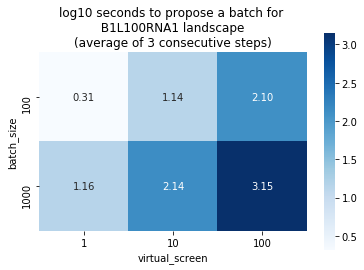

In [35]:
sns.heatmap(np.log10(sub_data.pivot("batch_size","virtual_screen","time1xround"))\
            , annot=True, fmt=".2f", square=True, cmap="Blues")
plt.title("log10 seconds to propose a batch for \n B1L100RNA1 landscape \n(average of 3 consecutive steps)")

In [36]:
efficiency_data=pd.read_csv("simulations/eval/EF/Greedy_mu0.02_tr0.05_r0.1_rho1.csv")

In [37]:
efficiency_data.head()

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,mo_ratio,horizon,explorer_type
0,1,GAACGAGGCACAUUCCGGCUCGCCUGGCCUAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
1,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
2,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.649750,0.649750,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
3,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.638601,0.638601,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1
4,1,GAACGAGGCACAUUCCGGCUCGCCCGGCCCAUGUGAGCAUGGGCCG...,0.632449,0.632449,1000,1001,1091,B1L100RNA1,startRNAL100_0,NAMb0ss1maxunc4,1,10,Greedy_mu0.02_tr0.05_r0.1_rho1


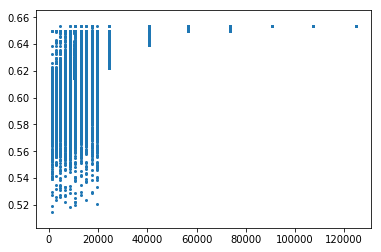

In [46]:
plt.scatter( efficiency_data.virtual_evals,efficiency_data.true_score,s=4)

In [5]:
data1=pd.read_csv("../simulations/evaluations_test/consistency_robustness_independence/MLWFG_mu1_r0.1_rho1_beta100.csv",index_col=False)
data2=pd.read_csv("../simulations/evaluations_test/consistency_robustness_independence/WF_mu1_r0.1_rho1_beta100.csv",index_col=False)
data3=pd.read_csv("../simulations/evaluations_test/consistency_robustness_independence/Greedy_mu1_tr0.05_r0.1_rho1.csv",index_col=False)


In [6]:
data=data1.append(data2).append(data3)

In [7]:
data.head()

,id,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,6ae1ab7a-3e07-11ea-abec-f218984ddad3,1,AUGGGACGGGCCCC,0.524524,3.266725,100,101,338,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
1,6ae1ab7a-3e07-11ea-abec-f218984ddad3,1,AUGCGCCGGACGCC,0.444884,3.230752,100,101,338,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
2,6ae1ab7a-3e07-11ea-abec-f218984ddad3,1,ACGUGCCGGACCCC,0.494315,3.204146,100,101,338,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
3,6ae1ab7a-3e07-11ea-abec-f218984ddad3,1,AUUGGCCGGACUCC,0.381721,2.688208,100,101,338,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100
4,6ae1ab7a-3e07-11ea-abec-f218984ddad3,1,AUAGGGGGGACCCC,0.562970,2.561647,100,101,338,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,MLWFG_mu1_r0.1_rho1_beta100


In [8]:
sub_data=data[data.model_type=="NAMb_ss1"]

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


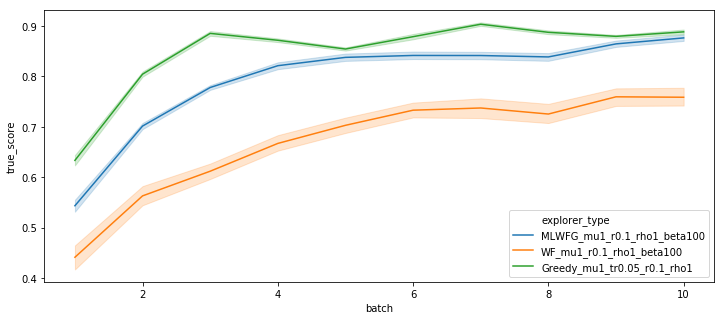

In [17]:
plt.figure(figsize=(12,5))
sns.lineplot(x="batch",y="true_score",hue="explorer_type",data=sub_data )